In [1]:
#Importing Necessary Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing and Reading the Dataset
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


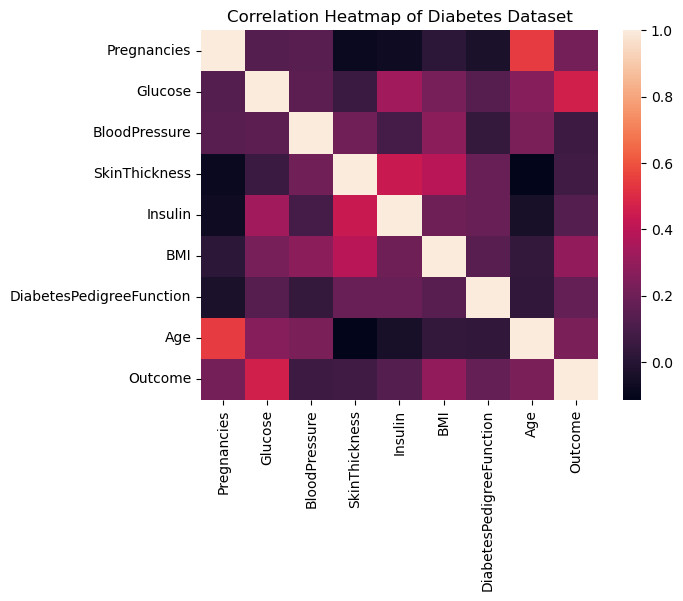

In [3]:
#Plotting Heatmap of the Dataset
plt.figure(1)
sns.heatmap(dataset.corr())
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()

In [4]:
# Replace 0 values with the median of the feature's distribution to handle Zero (0) values
columns_with_zeros = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] #List contatining parameters with 0 values
for column in columns_with_zeros:
    median = dataset[column].median()
    dataset[column] = dataset[column].replace(0, median)

dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,27,33.6,0.627,50,1
1,1,85,66,29,27,26.6,0.351,31,0
2,8,183,64,23,27,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,3,137,40,35,168,43.1,2.288,33,1


In [5]:
#Splitting dataset into train-test data
from sklearn.model_selection import train_test_split

x = dataset.drop(columns = ['Outcome']) #Features
y = dataset['Outcome'] #Target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25) #Train-Test Split

Node 0 Gini index: 0.929418954323556
Node 0 Entropy: -5292.490672488443
Node 1 Gini index: 0.705098104499076
Node 1 Entropy: -2849.3429560032205
Node 3 Gini index: 0.8112781244591328
Node 3 Entropy: -2085.8156313873983
Node 4 Gini index: 0.5200579828858849
Node 4 Entropy: -972.4303953655921
Node 5 Gini index: 0.4618043316752015
Node 5 Entropy: -938.3525639216582
Node 6 Gini index: 0.26014536394771426
Node 6 Entropy: -592.2093122580814
Node 8 Gini index: 0.4689955935892812
Node 8 Entropy: -212.8771237954945
Node 9 Gini index: 0.7424875695421236
Node 9 Entropy: -80.71062275542812
Node 11 Gini index: 0.9709505944546686
Node 11 Entropy: -33.219280948873624
Node 12 Gini index: 0.5916727785823275
Node 12 Entropy: -19.651484454403228
Node 17 Gini index: 0.74959525725948
Node 17 Entropy: -226.47733175670794
Node 18 Gini index: 0.37123232664087563
Node 18 Entropy: -134.6059378176129
Node 20 Gini index: 0.9182958340544896
Node 20 Entropy: -15.509775004326936
Node 22 Gini index: 0.918295834054489

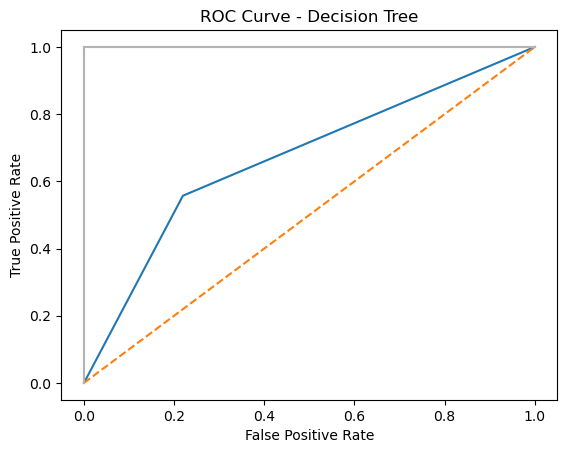

In [6]:
#DECISION TREE (DT)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve

dt_classifier = DecisionTreeClassifier() #Decision Tree Classifier model
dt_classifier.fit(x_train, y_train) #Training the Classifier with the training data
dt_pred = dt_classifier.predict(x_test) #Using the trained Classifier model to predict the testing data 

dt_model = DecisionTreeClassifier(criterion='entropy') #Decision Tree Classifier model for calculating Information Gain
dt_model.fit(x_train, y_train) #Training the Classifier with the training data
importances = dt_model.feature_importances_ #Retrieving the Feature importances
tree_structure = dt_model.tree_ #Accessing the tree structure for calculating the Gini index and Entropy

# Displaying the Gini index and Entropy for each node (split) in the tree
for i in range(tree_structure.node_count):
    if tree_structure.children_left[i] != tree_structure.children_right[i]:  # If condition for the case where it is a split node
        gini_index = tree_structure.impurity[i]  # Gini index impurity at the split node
        print(f'Node {i} Gini index: {gini_index}')
        entropy_value = -np.sum(tree_structure.weighted_n_node_samples[i]) * np.log2(tree_structure.weighted_n_node_samples[i])  # Calculating the Entropy
        print(f'Node {i} Entropy: {entropy_value}')

dt_report = classification_report(y_test, dt_pred) #Classification Report
dt_matrix = confusion_matrix(y_test, dt_pred) #Confusion Matrix
dt_accuracy = accuracy_score(y_test, dt_pred) #Accuracy Score
dt_fp_rate, dt_tp_rate, dt_threshold = roc_curve(y_test, dt_pred) #ROC Curve
dt_sensitivity = dt_matrix[0,0] / (dt_matrix[0,0] + dt_matrix[0,1]) #Sensitivity = TP / (TP + FN)
dt_specificity = dt_matrix[1,1] / (dt_matrix[1,1] + dt_matrix[1,0]) #Specificity = TN / (TN + FP)
dt_precision = dt_matrix[0,0] / (dt_matrix[0,0] + dt_matrix[1,0]) #Precision = TP / (TP + FP)


print(dt_report)
print(dt_matrix)
print('Decision Tree Accuracy = ',dt_accuracy)
print('Decision Tree Sensitivity = ',dt_sensitivity)
print('Decision Tree Specificity = ',dt_specificity)
print('Decision Tree Precision = ',dt_precision)
plt.title('ROC Curve - Decision Tree')
plt.plot(dt_fp_rate, dt_tp_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [7]:
#K-NEAREST NEIGHBOUR (KNN)
from sklearn.preprocessing import MinMaxScaler

#Normalization Preproccesing Technique
scaler = MinMaxScaler()

#Columns that require normalization
scale_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
normalized_data = scaler.fit_transform(dataset[scale_columns])
normalized_dataset = pd.DataFrame(normalized_data, columns = scale_columns) #Converting normalized data into dataset
normalized_dataset['Outcome'] = dataset['Outcome'] #Adding the unaltered Target variable to the Normalized Dataset
normalized_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.3125,0.670968,0.489796,0.304348,0.015625,0.314928,0.234415,0.483333,1
1,0.0000,0.264516,0.428571,0.239130,0.015625,0.171779,0.116567,0.166667,0
2,0.4375,0.896774,0.408163,0.173913,0.015625,0.104294,0.253629,0.183333,1
3,0.0000,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.1250,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1


In [8]:
#Splitting dataset into train-test data
x_normal = normalized_dataset.drop(columns = 'Outcome') #Features
y_normal = normalized_dataset['Outcome'] #Target
x_train_normal, x_test_normal, y_train_normal, y_test_normal = train_test_split(x_normal, y_normal, test_size = 0.25) #Train-Test Split

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       133
           1       0.55      0.60      0.58        60

    accuracy                           0.73       193
   macro avg       0.68      0.69      0.69       193
weighted avg       0.73      0.73      0.73       193

[[104  29]
 [ 24  36]]
K-Nearest Neighbor Accuracy =  0.7253886010362695
K-Nearest Neighbor Sensitivity =  0.7819548872180451
K-Nearest Neighbor Specificity =  0.6
K-Nearest Neighbor Precision =  0.8125


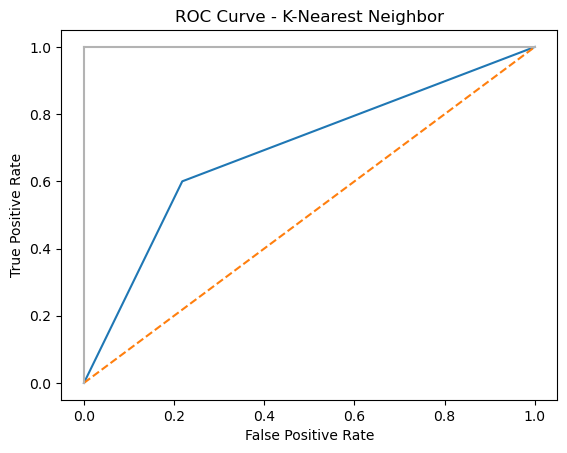

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5) #K-Nearest Neighbor Classifier model
knn_classifier.fit(x_train_normal, y_train_normal) #Training the Classifier with the training data
knn_pred = knn_classifier.predict(x_test_normal) #Using the trained Classifier model to predict the testing data

knn_report = classification_report(y_test_normal, knn_pred) #Classification Report
knn_matrix = confusion_matrix(y_test_normal, knn_pred) #Confusion Matrix
knn_accuracy = accuracy_score(y_test_normal, knn_pred) #Accuracy Score
knn_fp_rate, knn_tp_rate, knn_threshold = roc_curve(y_test_normal, knn_pred) #ROC Curve
knn_sensitivity = knn_matrix[0,0] / (knn_matrix[0,0] + knn_matrix[0,1]) #Sensitivity = TP / (TP + FN)
knn_specificity = knn_matrix[1,1] / (knn_matrix[1,1] + knn_matrix[1,0]) #Specificity = TN / (TN + FP)
knn_precision = knn_matrix[0,0] / (knn_matrix[0,0] + knn_matrix[1,0]) #Precision = TP / (TP + FP)


print(knn_report)
print(knn_matrix)
print('K-Nearest Neighbor Accuracy = ',knn_accuracy)
print('K-Nearest Neighbor Sensitivity = ',knn_sensitivity)
print('K-Nearest Neighbor Specificity = ',knn_specificity)
print('K-Nearest Neighbor Precision = ',knn_precision)
plt.title('ROC Curve - K-Nearest Neighbor')
plt.plot(knn_fp_rate, knn_tp_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()